1. What is a Convolutional Neural Network (CNN), and how does it differ from traditional fully connected neural networks in terms of architecture and performance on image data?

Ans: A Convolutional Neural Network (CNN) is a class of deep neural networks designed to process data with a grid-like topology (e.g., images). CNNs use convolutional layers that apply learnable filters (kernels) across spatial dimensions to extract local patterns (edges, textures, shapes), pooling layers to reduce spatial resolution and introduce invariance, and (optionally) fully connected layers for final classification.

**Architectural differences vs fully connected (dense) networks**

1. **Local connectivity vs full connectivity**
   - **CNN**: neurons in a convolutional layer connect only to a small spatial neighborhood of the previous layer (receptive field).
   - **Fully connected NN**: every neuron connects to every neuron in the previous layer.

2. **Parameter sharing**
   - **CNN**: same convolutional kernel (set of weights) is applied across different spatial positions → huge parameter savings and built-in translational equivariance.
   - **Fully connected**: each weight is unique; parameter count explodes with input size.

3. **Spatial structure preserved**
   - **CNN**: maintains 2D spatial relationships through convolution and pooling (height × width × channels).
   - **Fully connected**: flattens input; spatial structure lost.

4. **Downsampling / hierarchical features**
   - **CNN**: pooling and strided convolutions reduce spatial size, enabling hierarchical feature extraction (edges → motifs → objects).
   - **Fully connected**: no natural spatial hierarchy.




## Question 2 — Discuss the architecture of LeNet-5 and explain how it laid the foundation for modern deep learning models in computer vision. Include references to its original research paper.

**LeNet-5 **  
LeNet-5 (1998) by Yann LeCun et al. is one of the earliest successful CNNs, built for handwritten digit recognition (MNIST-like tasks). It introduced a practical convolutional architecture and training ideas that became foundational.

**Architecture **  
Typical LeNet-5 layers (input 32×32 grayscale image as originally used):

1. **Input** — 32×32 gray image  
2. **C1 — Conv** — 6 filters, size 5×5, stride 1 → output 28×28×6  
3. **S2 — Subsampling / Pooling** — average pooling 2×2, stride 2 → output 14×14×6  
4. **C3 — Conv** — 16 filters, size 5×5 (but not all feature maps fully connected to previous maps in original paper) → output 10×10×16  
5. **S4 — Subsampling / Pooling** — average pooling 2×2 → output 5×5×16  
6. **C5 — Conv** — 120 filters, size 5×5 → output 1×1×120 (acts like fully connected)  
7. **F6 — Fully connected** — 84 units  
8. **Output layer** — 10 units (one per digit) with softmax / Euclidean loss depending on formulation

**Key design elements introduced**

- **Convolution + pooling stacks** for hierarchical feature extraction.
- **Local receptive fields** and **parameter sharing**.
- **Early use of backpropagation** at scale for image models.
- **End-to-end supervised learning** on raw pixel inputs (rather than hand-crafted features).
- **Use of multiple feature maps** per layer.

**Original paper**  
- Yann LeCun, Léon Bottou, Yoshua Bengio, Patrick Haffner — “Gradient-Based Learning Applied to Document Recognition” (1998).



## Question 3 — Compare and contrast AlexNet and VGGNet: design principles, parameters, performance, innovations, and limitations

**AlexNet (2012)**  
- **Design**: 5 convolutional layers + 3 fully connected layers; Rectified Linear Units (ReLU) activations; local response normalization (LRN) used; dropout in FC layers to reduce overfitting; trained with GPU parallelism (two GPUs).
- **Key innovations**:
  - Use of ReLU for faster convergence.
  - Large data + deep CNNs winning ImageNet spurred revival.
  - Data augmentation and dropout for regularization.
- **Parameters**: ~60–90M depending on variant (AlexNet commonly ~60M).
- **Performance**: Drastically reduced ImageNet top-5 error compared to earlier methods.
- **Limitations**:
  - Relatively large receptive fields in earlier layers (11×11) — coarse early features.
  - Many parameters in FC layers → heavy memory and compute.
  - LRN later considered unnecessary.

**VGGNet (2014)**  
- **Design**: Very deep (VGG-16 and VGG-19 common) using a simple repeating pattern: 3×3 convs stacked (with ReLU) and 2×2 max pooling, finishing with 3 FC layers.
- **Key innovations**:
  - Showed depth (more layers) with small 3×3 filters yields better performance.
  - Simpler architecture and consistent design made it easier to reason about.
- **Parameters**: Very large — VGG-16 ≈ 138M parameters (because of large FC layers).
- **Performance**: Improved over AlexNet on ImageNet; became popular as a feature extractor.
- **Limitations**:
  - Huge parameter count → memory and inference cost.
  - Computationally heavy (many conv layers, lots of FLOPs).
  - No residual connections → training very deep nets becomes harder without other tricks.




## Question 4 — What is transfer learning in image classification? How does it reduce computational cost and improve performance with limited data?

**Definition**  
Transfer learning adapts a model trained on one task (usually on large datasets like ImageNet) to another related task. In vision, this typically means reusing convolutional feature extractors from pre-trained models and retraining the classifier head on a new dataset.

**Common transfer learning approaches**

1. **Feature extraction (frozen backbone)**  
   - Freeze the pre-trained backbone (convolutional layers). Replace and train a new classification head (few parameters) on target data.

2. **Fine-tuning**  
   - Initialize with pre-trained weights; unfreeze some top layers (or entire network) and continue training with a lower learning rate on target data.

3. **Hybrid**  
   - Train new head first, then unfreeze some layers and fine-tune.


**When to use which approach**

- **Feature extraction**: small dataset, low compute budget.
- **Fine-tuning**: moderate dataset size, want higher accuracy — unfreeze top few conv blocks.
- **Full retrain**: large dataset and compute available.




## Question 5 — Describe the role of residual connections in ResNet. How do they address the vanishing gradient problem?

**Residual connection concept**  
ResNet (Residual Network) introduces “shortcut” or “skip” connections that add the input of a block to its output — i.e., the block learns a residual function `F(x) = H(x) − x`, so the block outputs `y = F(x) + x`.

**Why residuals help**

1. **Eases optimization**  
   - The residual formulation makes it easier for the block to learn identity mappings (if needed) by pushing weights toward zero; thus deeper networks can at least perform as well as shallower ones, reducing degradation.

2. **Mitigates vanishing gradients**  
   - During backpropagation, the skip connection provides a direct path for gradients to flow from deeper layers to earlier layers without vanishing through many nonlinear transforms — gradients can bypass layers via the identity shortcut.

3. **Improved representational capacity**  
   - Enables architectures hundreds of layers deep (ResNet-50, ResNet-101, ResNet-152), improving classification performance.




---
## Question 6 — Implement LeNet-5 using PyTorch to classify the MNIST dataset




In [1]:


import time
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Hyperparameters
batch_size = 128
epochs = 10
lr = 0.01
momentum = 0.9
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data (MNIST)
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_ds = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_ds  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader  = DataLoader(test_ds, batch_size=batch_size, shuffle=False, num_workers=2)

# LeNet-5 model
class LeNet5(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)   # 32->28
        self.pool  = nn.AvgPool2d(2, stride=2)        # avg pool as original
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)  # 14->10
        self.conv3 = nn.Conv2d(16, 120, kernel_size=5) # 5->1
        self.fc1   = nn.Linear(120, 84)
        self.fc2   = nn.Linear(84, num_classes)
        self.relu  = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(self.conv3(x))
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=1e-4)

# Training and evaluation
def test(model, loader):
    model.eval()
    correct = 0
    total = 0
    loss_total = 0.0
    with torch.no_grad():
        for data, target in loader:
            data, target = data.to(device), target.to(device)
            outputs = model(data)
            loss = criterion(outputs, target)
            loss_total += loss.item() * data.size(0)
            _, preds = outputs.max(1)
            correct += preds.eq(target).sum().item()
            total += data.size(0)
    return loss_total / total, correct / total

start_time = time.time()
for epoch in range(1, epochs + 1):
    model.train()
    running_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader, 1):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if batch_idx % 200 == 0:
            print(f"Epoch {epoch} Batch {batch_idx} Loss {running_loss / 200:.4f}")
            running_loss = 0.0

    train_loss, train_acc = test(model, train_loader)
    test_loss, test_acc = test(model, test_loader)
    elapsed = time.time() - start_time
    print(f"Epoch {epoch} finished. Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}, Elapsed: {elapsed:.1f}s")

total_time = time.time() - start_time
print(f"Total training time: {total_time:.1f}s")


100%|██████████| 9.91M/9.91M [00:01<00:00, 5.04MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 129kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.23MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 12.3MB/s]


Epoch 1 Batch 200 Loss 1.4992
Epoch 1 Batch 400 Loss 0.2750
Epoch 1 finished. Train acc: 0.9500, Test acc: 0.9538, Elapsed: 31.7s
Epoch 2 Batch 200 Loss 0.1363
Epoch 2 Batch 400 Loss 0.1085
Epoch 2 finished. Train acc: 0.9730, Test acc: 0.9741, Elapsed: 62.3s
Epoch 3 Batch 200 Loss 0.0844
Epoch 3 Batch 400 Loss 0.0767
Epoch 3 finished. Train acc: 0.9810, Test acc: 0.9810, Elapsed: 94.0s
Epoch 4 Batch 200 Loss 0.0603
Epoch 4 Batch 400 Loss 0.0599
Epoch 4 finished. Train acc: 0.9851, Test acc: 0.9828, Elapsed: 125.3s
Epoch 5 Batch 200 Loss 0.0505
Epoch 5 Batch 400 Loss 0.0525
Epoch 5 finished. Train acc: 0.9883, Test acc: 0.9865, Elapsed: 154.8s
Epoch 6 Batch 200 Loss 0.0456
Epoch 6 Batch 400 Loss 0.0434
Epoch 6 finished. Train acc: 0.9863, Test acc: 0.9849, Elapsed: 185.1s
Epoch 7 Batch 200 Loss 0.0365
Epoch 7 Batch 400 Loss 0.0391
Epoch 7 finished. Train acc: 0.9903, Test acc: 0.9869, Elapsed: 214.7s
Epoch 8 Batch 200 Loss 0.0303
Epoch 8 Batch 400 Loss 0.0353
Epoch 8 finished. Train ac


---
## Question 7 — Transfer learning using pre-trained VGG16 (TensorFlow / Keras)



In [2]:



import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'data/flowers/train'
val_dir   = 'data/flowers/val'
img_size = (224, 224)
batch_size = 32
num_classes = 5

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
val_gen   = val_datagen.flow_from_directory(val_dir,   target_size=img_size, batch_size=batch_size, class_mode='categorical')

base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(*img_size,3))
base_model.trainable = False

inputs = tf.keras.Input(shape=(*img_size,3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)
model = models.Model(inputs, outputs)

model.compile(optimizer=optimizers.Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])


history_head = model.fit(train_gen, validation_data=val_gen, epochs=10)


base_model.trainable = True
for layer in base_model.layers[:-4]:
    layer.trainable = False

model.compile(optimizer=optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
history_finetune = model.fit(train_gen, validation_data=val_gen, epochs=10)


FileNotFoundError: [Errno 2] No such file or directory: 'data/flowers/train'


---
## Question 8 — Visualize filters and feature maps of the first convolutional layer of AlexNet




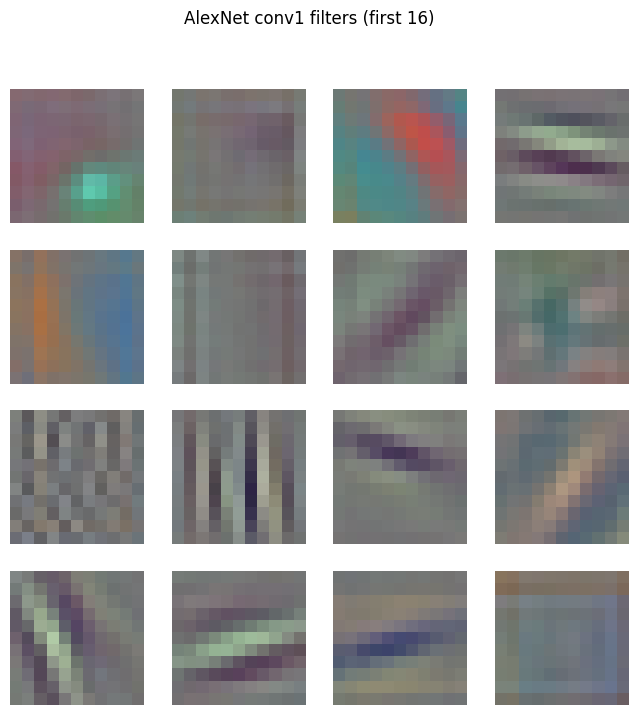

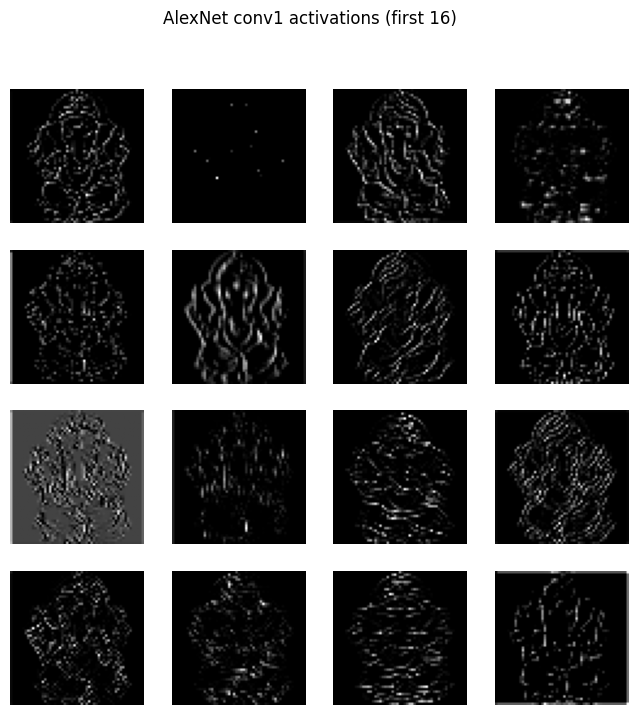

In [5]:



import torch
import torchvision
from torchvision import transforms, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


model = models.alexnet(pretrained=True).eval()


conv1 = model.features[0]
weights = conv1.weight.data.clone().cpu()  # [64,3,11,11]
min_w, max_w = weights.min(), weights.max()
filters = (weights - min_w) / (max_w - min_w)

n = 16
plt.figure(figsize=(8,8))
for i in range(n):
    f = filters[i].permute(1,2,0).numpy()
    plt.subplot(4,4,i+1)
    plt.imshow(f)
    plt.axis('off')
plt.suptitle('AlexNet conv1 filters (first 16)')
plt.show()


img_path = '/content/ganesh.jpg'
img = Image.open(img_path).convert('RGB')
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])
])
input_tensor = preprocess(img).unsqueeze(0)


with torch.no_grad():
    act1 = model.features[0](input_tensor)
    act1_relu = model.features[1](act1)

act = act1_relu.squeeze(0).cpu()
plt.figure(figsize=(8,8))
for i in range(16):
    fmap = act[i].numpy()
    fmap = (fmap - fmap.min()) / (fmap.max() - fmap.min() + 1e-6)
    plt.subplot(4,4,i+1)
    plt.imshow(fmap, cmap='gray')
    plt.axis('off')
plt.suptitle('AlexNet conv1 activations (first 16)')
plt.show()



---
## Question 9 — Train GoogLeNet (Inception v1) or variant on CIFAR-10 and analyze overfitting/underfitting



In [ ]:



import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import time

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data transforms (resize to 299 if using inception_v3; otherwise adjust)
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.Resize(299),
    transforms.ToTensor(),
    transforms.Normalize((0.4914,0.4822,0.4465),(0.2023,0.1994,0.2010))
])
transform_test = transforms.Compose([
    transforms.Resize(299),
    transforms.ToTensor(),
    transforms.Normalize((0.4914,0.4822,0.4465),(0.2023,0.1994,0.2010))
])

trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
testset  = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
train_loader = DataLoader(trainset, batch_size=64, shuffle=True, num_workers=4)
test_loader  = DataLoader(testset,  batch_size=128, shuffle=False, num_workers=4)

model = models.inception_v3(pretrained=False, aux_logits=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)
if model.aux_logits:
    model.AuxLogits.fc = nn.Linear(model.AuxLogits.fc.in_features, 10)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

def evaluate(loader):
    model.eval()
    correct, total = 0, 0
    loss_total = 0.0
    with torch.no_grad():
        for data, target in loader:
            data, target = data.to(device), target.to(device)
            outputs = model(data)
            if isinstance(outputs, tuple):
                outputs = outputs[0]
            loss = criterion(outputs, target)
            loss_total += loss.item() * data.size(0)
            _, preds = outputs.max(1)
            correct += preds.eq(target).sum().item()
            total += data.size(0)
    return loss_total / total, correct / total

train_accs, val_accs = [], []
train_losses, val_losses = [], []
epochs = 40
start = time.time()
for epoch in range(1, epochs+1):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0
    for i, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        outputs = model(data)
        if isinstance(outputs, tuple):
            outputs, aux = outputs[0], outputs[1]
            loss = criterion(outputs, target) + 0.4*criterion(aux, target)
        else:
            loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, preds = outputs.max(1)
        correct += preds.eq(target).sum().item()
        total += data.size(0)
    scheduler.step()
    train_loss = running_loss / len(train_loader)
    train_acc = correct / total
    val_loss, val_acc = evaluate(test_loader)
    train_losses.append(train_loss); val_losses.append(val_loss)
    train_accs.append(train_acc); val_accs.append(val_acc)
    print(f"Epoch {epoch} Train acc {train_acc:.4f} Val acc {val_acc:.4f} Train loss {train_loss:.4f} Val loss {val_loss:.4f}")

print("Total time:", time.time() - start)

# Plot Training and Validation accuracy
plt.figure()
plt.plot(range(1,epochs+1), train_accs, label='train_acc')
plt.plot(range(1,epochs+1), val_accs, label='val_acc')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend(); plt.show()


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packa


---
## Question 10 — Healthcare AI startup: Classifying chest X-rays into normal, pneumonia, and COVID-19 with limited labelled data


1. **Data collection & curation**
   - Gather labelled chest X-rays (public datasets: NIH ChestX-ray14, RSNA, COVIDx) and verify licensing.
   - Verify label quality; use radiologist consensus or label correction.
2. **Preprocessing**
   - Standardize DICOM windows, resize appropriately, and normalize.
3. **Data augmentation**
   - Controlled rotations, translations, brightness/contrast changes, simulated acquisition noise; avoid unrealistic transforms that alter anatomy.
4. **Class balancing**
   - Use focal loss, class weights, oversampling, or augmentation for minority classes.
5. **Model selection & training**
   - Start with pretrained ResNet/EfficientNet, freeze backbone and train head, then fine-tune with a lower LR. Use mixed precision for speed.
6. **Regularization & calibration**
   - Weight decay, dropout, and temperature scaling for calibration.
7. **Evaluation**
   - Use stratified k-fold CV; report sensitivity, specificity, AUC-ROC, confusion matrices, and subgroup analysis.
8. **Human-in-the-loop**
   - Use model for triage or second-read; high-risk decisions finalized by radiologists.

